In [1]:
from regression import*

Using TensorFlow backend.


# DATA

In [116]:
# Load Data
# -----------------------------------------------------
def get_data(dataset_name, features='synth_vind'):
    dataset_df_list = load_dataset(dataset_name, as_dict=False)
    X, Y = list(), list()
    for data in dataset_df_list:            
        
        vind = data.filter(regex=features).to_numpy()[:,[0,1]]
        # norm = np.array([list(yn) for yn in data.filter(regex='norm').to_numpy()])[:,0,:]
        # alpha = np.arccos(norm[:,2])*180/pi
        # x = np.concatenate([vind, norm], axis=1)
        x = vind

        y = np.nanmean(np.array([list(yn) for yn in data.filter(regex='center_1').to_numpy()]), axis=1)
        # y = np.linalg.norm( y, axis=1)        
        # y = np.linalg.norm( y[:,:2], axis=1)        
        y = y[:,2]
        # y = alpha

        X.append(x)
        Y.append(y)
    return DATA(X, Y)
# -----------------------------------------------------
train_data_raw, validation_data_raw = get_data( 'synth_2coils_parallel', features='synth_vind').split(ratio=.95) 
# test_data_raw = get_data('arduino', features='meas_vind')

print(np.shape(train_data_raw.X))
# print(np.shape(test_data_raw.X), np.shape(test_data_raw.X[0]))

(1900, 338, 2)


In [118]:
# Process Data
# -----------------------------------------------------
def data_processing(data): 
    # return data.segment(win_size=20, step=5).get_features()
    return data.segment(win_size=20, step=5)
# -----------------------------------------------------
train_data = data_processing(train_data_raw).get_df(merge=True)
validation_data = data_processing(validation_data_raw).get_df(merge=False)
# test_data = data_processing(test_data_raw).get_df(merge=False)

# MODEL

In [119]:
exp_reg = setup(train_data,
                train_size = .7,
                target = 'target', 
                # normalize = True, 
                # feature_selection = True, 
                silent = True,
                session_id = 0
                )   


Setup Succesfully Completed!


In [120]:
model = tune_model('lightgbm')
# model = create_model('lightgbm')
# model = tune_model(model, optimize='rmse', n_iter=100, round=18)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.0432  0.0033  0.0575  0.4729  0.0442 -0.1627
1     0.0430  0.0032  0.0570  0.4820  0.0438 -0.1630
2     0.0437  0.0034  0.0581  0.4564  0.0447 -0.1668
3     0.0439  0.0034  0.0586  0.4709  0.0450 -0.1653
4     0.0433  0.0033  0.0577  0.4808  0.0444 -0.1645
5     0.0429  0.0033  0.0573  0.4749  0.0440 -0.1611
6     0.0430  0.0033  0.0574  0.4664  0.0442 -0.1632
7     0.0434  0.0034  0.0579  0.4765  0.0444 -0.1616
8     0.0431  0.0033  0.0575  0.4829  0.0442 -0.1650
9     0.0426  0.0032  0.0566  0.4902  0.0436 -0.1630
Mean  0.0432  0.0033  0.0576  0.4754  0.0443 -0.1636
SD    0.0004  0.0001  0.0005  0.0090  0.0004  0.0017

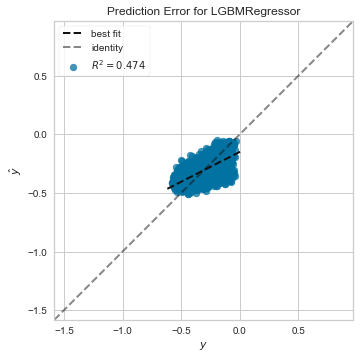

In [121]:
plot_model(model, plot='error')
# plot_model(model, plot='feature')

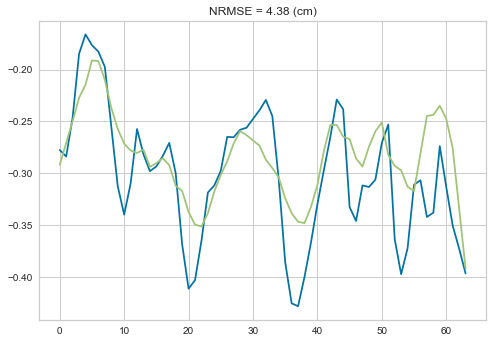

In [122]:
# data = train_data.loc[:200,:]
data = validation_data[10]
# data = test_data[8]

prediction = predict_model(model, data=data)
y_true = prediction.target.to_numpy()
y_pred = prediction.Label.to_numpy()
y_pred = signal.savgol_filter(y_pred, window_length=5, polyorder=1, axis=0)             

# nrmse = round( mean_squared_error(y_true, y_pred) / np.nanmean(y_true) * 100, 2)
nrmse = round( sqrt(mean_squared_error(y_true, y_pred)) * 100, 2)

plt.plot(y_true)
plt.plot(y_pred)
plt.title( 'NRMSE = ' + str(nrmse) + ' (cm)' )
plt.show()


In [6]:
compare_models()

In [23]:
dataset = load_dataset('synth_3coils')

In [17]:
for data in dataset[:1]:
    n = np.array(data.norm.to_list())    
    c1 = np.array(data.center_1.to_list())
    c2 = np.array(data.center_2.to_list())

    v1 = data.meas_vind_1.to_numpy()
    v2 = data.meas_vind_2.to_numpy()

    d1 = np.linalg.norm(c1, axis=1)
    d2 = np.linalg.norm(c2, axis=1)

    ld1 = np.linalg.norm(c1[:,:2], axis=1)
    ld2 = np.linalg.norm(c2[:,:2], axis=1)

    alpha = np.arccos(n[:,2]) * 180/pi

    dc1 = np.diff(c1, axis=0)
    dc2 = np.diff(c2, axis=0)
    dalpha = np.diff(alpha, axis=0)

    fig, axs = plt.subplots(4,1)
    axs[0].plot(d1)
    axs[0].plot(d2)
    axs[1].plot(ld1)
    axs[1].plot(ld2)
    axs[2].plot(alpha)
    axs[3].plot(v1)
    axs[3].plot(v2)
    plt.show()


In [31]:
# 

In [120]:
# dataset = load_dataset('arduino')
# for n, data in enumerate(dataset):
#     file_path = 'C:/Users/mixil/Desktop/MIHAR_Hardware/experiments/dataset/arduino/data_/record_' + "{0:0=2d}".format(n) + '.csv'
#     data = data.rename(columns={'vind_1':'meas_vind_1', 'vind_2':'meas_vind_2'})
#     data.to_csv(file_path, index=None) 